# Measuring prediction performance

Here we will discuss how to use **validation sets** to get a better measure of
performance for a classifier.

## Using the K-neighbors classifier

Here we'll continue to look at the digits data, but we'll switch to the
K-Neighbors classifier.  The K-neighbors classifier is an instance-based
classifier.  The K-neighbors classifier predicts the label of
an unknown point based on the labels of the *K* nearest points in the
parameter space.

In [2]:
# Get the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [4]:
# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

In [5]:
print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we've found a perfect classifier!  But this is misleading
for the reasons we saw before: the classifier essentially "memorizes"
all the samples it has already seen.  To really test how well this
algorithm does, we need to try some samples it *hasn't* yet seen.

This problem can also occur with regression models. In the following we fit an other instance-based model named "decision tree" to the Boston Housing price dataset we introduced previously:

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

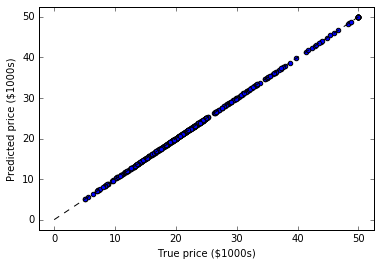

In [7]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Here again the predictions are seemingly perfect as the model was able to perfectly memorize the training set.

## A Better Approach: Using a validation set

Learning the parameters of a prediction function and testing it on the
same data is a methodological mistake: a model that would just repeat
the labels of the samples that it has just seen would have a perfect
score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

- a training set X_train, y_train which is used for learning the parameters of a predictive model
- a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the
`train_test_split` helper function.  It can be used this way:

In [8]:
from sklearn.cross_validation import train_test_split
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Now we train on the training data, and test on the testing data:

In [9]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [11]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      1.00      1.00        43
          2       1.00      0.98      0.99        44
          3       0.96      1.00      0.98        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      0.96      0.97        47

avg / total       0.99      0.99      0.99       450



precision: number of true positives divided by the total number of elements labeled as belonging to the positive class

recall : number of true positives divided by the total number of elements that actually belong to the positive class

F1 = precision.recall / (precision + recall)

The averaged f1-score is often used as a convenient measure of the
overall performance of an algorithm.  It appears in the bottom row
of the classification report; it can also be accessed directly:

In [ ]:
metrics.f1_score(y_test, y_pred, average='weighted')

The over-fitting we saw previously can be quantified by computing the
f1-score on the training data itself:

In [ ]:
metrics.f1_score(y_train, clf.predict(X_train), average='weighted')

### Validation with a Regression Model

These validation metrics also work in the case of regression models.  Here we'll use
a Gradient-boosted regression tree, which is a meta-estimator which makes use of the
``DecisionTreeRegressor`` we showed above.  We'll start by doing the train-test split
as we did with the classification case:

In [ ]:
data = load_boston()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

Next we'll compute the training and testing error using the Decision Tree that
we saw before:

In [ ]:
est = DecisionTreeRegressor().fit(X_train, y_train)

validation_score = metrics.explained_variance_score(
    y_test, est.predict(X_test))

print("validation: %r" % validation_score)

training_score = metrics.explained_variance_score(
    y_train, est.predict(X_train))

print("training: %r" % training_score)

This large spread between validation and training error is characteristic
of a **high variance** model.  Decision trees are not entirely useless,
however: by combining many individual decision trees within ensemble
estimators such as Gradient Boosted Trees or Random Forests, we can get
much better performance:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor().fit(X_train, y_train)

validation_score = metrics.explained_variance_score(
    y_test, est.predict(X_test))

print("validation: %r" % validation_score)

training_score = metrics.explained_variance_score(
    y_train, est.predict(X_train))

print("training: %r" % training_score)

This model is still over-fitting the data, but not by as much as the single tree.

## Exercise: Model Selection via Validation

Here we saw K-neighbors classification of the digits. We've also seen support vector
machine classification of digits. Now that we have these
validation tools in place, we can ask quantitatively which of the three estimators
works best for the digits dataset.

Take a moment and determine the answers to these questions for the digits dataset:

- With the default hyper-parameters for each estimator, which gives the best f1 score
  on the **validation set**?  Recall that hyperparameters are the parameters set when
  you instantiate the classifier: for example, the ``n_neighbors`` in

          clf = KNeighborsClassifier(n_neighbors=1)

  To use the default value, simply leave them unspecified.
- For each classifier, which value for the hyperparameters gives the best results for
  the digits data?  For ``LinearSVC``, use ``loss='l2'`` and ``loss='l1'``.  For
  ``KNeighborsClassifier`` use ``n_neighbors`` between 1 and 10. Try also
  ``GaussianNB``. Note that it does not have any adjustable hyperparameters.
- Bonus: do the same exercise on the Iris data rather than the Digits data.  Does the
  same classifier/hyperparameter combination win out in this case?

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### Solution

In [ ]:
%load solutions/05C_validation_exercise.py